## Business Understanding
The goal is to analyze the Seattle AirBnB dataset to understand the rental landscape and inform decision-making for a person or company interested in offering locations in Seattle.

Question 1: Is there a relation between the size and the costs per night?

Question 2: What amenities increase the chance of a listing being booked?

Question 3: Where should the service offering be placed in terms of distance to downtown Seattle to get the best price and a booking rate of at least 60%?

## Data Understanding

### Importing relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import matplotlib.ticker as ticker
from IPython.display import display
%matplotlib inline

### Making relevant settings for the notebook

In [2]:
pd.set_option('display.max_columns', 100)

### Access the data

In [3]:
listings_df = pd.read_csv('data/listings.csv')

### Explore the data

Using various operations to visualize the shape of the data set, the available columns and identify columns which are more usefull (complete and unique values) then others (less complete or completly empty)

In [4]:
listings_df.shape

(3818, 92)

In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [6]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
listings_df.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [8]:
listings_df.dtypes[listings_df.dtypes=='float64']    

host_listings_count            float64
host_total_listings_count      float64
latitude                       float64
longitude                      float64
bathrooms                      float64
bedrooms                       float64
beds                           float64
square_feet                    float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
license                        float64
reviews_per_month              float64
dtype: object

In [9]:
listings_df.dtypes[listings_df.dtypes=='int64']    

id                                int64
scrape_id                         int64
host_id                           int64
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
number_of_reviews                 int64
calculated_host_listings_count    int64
dtype: object

In [10]:
pd.set_option('display.max_rows', 100)
listings_df.dtypes[listings_df.dtypes=='object']

listing_url                         object
last_scraped                        object
name                                object
summary                             object
space                               object
description                         object
experiences_offered                 object
neighborhood_overview               object
notes                               object
transit                             object
thumbnail_url                       object
medium_url                          object
picture_url                         object
xl_picture_url                      object
host_url                            object
host_name                           object
host_since                          object
host_location                       object
host_about                          object
host_response_time                  object
host_response_rate                  object
host_acceptance_rate                object
host_is_superhost                   object
host_thumbn

In [11]:
listings_df.isnull().sum().sort_values(ascending=False)

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
last_review                          627
first_review                         627
reviews_per_month                    627
space                                569
host_response_rate                   523
host_response_time                   523
neighbourhood   

In [12]:
listings_df.nunique()[listings_df.nunique()==len(listings_df)]

id             3818
listing_url    3818
picture_url    3818
latitude       3818
longitude      3818
dtype: int64

In [13]:
listings_df.nunique()[listings_df.nunique() != len(listings_df)].sort_values(ascending=False)

name                                3792
description                         3742
thumbnail_url                       3498
medium_url                          3498
xl_picture_url                      3498
summary                             3478
amenities                           3284
space                               3119
host_url                            2751
host_id                             2751
host_picture_url                    2743
host_thumbnail_url                  2743
transit                             2574
neighborhood_overview               2506
host_about                          2011
notes                               1999
host_name                           1466
street                              1442
host_since                          1380
first_review                         984
reviews_per_month                    654
weekly_price                         395
availability_365                     363
monthly_price                        356
last_review     

## Data Preparation
In this section we will clean the data needed for answering the questions defined.

### Define functions   

In [14]:
def clean_amenity_entry(entry: str):
    """
    Clean up an amenity entry string.

    Parameters
    ----------
    entry : str
        The amenity entry string to clean.

    Returns
    -------
    List[str]
        A list of cleaned up amenities.

    """
    # Remove the outermost curly braces, square brackets, and extra quotes
    entry = entry.strip("[]{}").replace('"', '')
    # Split the string by comma to get individual amenities
    amenities = entry.split(',')
    # Remove leading/trailing whitespace and single quotes from each amenity
    amenities = [amenity.strip().strip("'") for amenity in amenities if amenity.strip().strip("'")]
    return amenities

In [15]:
from math import radians, sin, cos, sqrt, asin

def haversine(lon1: float, lat1: float, lon2: float, lat2: float) -> float:
    """
    Calculate the distance between two sets of coordinates using the Haversine formula.

    Parameters
    ----------
    lon1 : float
        Longitude of the first coordinate in decimal degrees.
    lat1 : float
        Latitude of the first coordinate in decimal degrees.
    lon2 : float
        Longitude of the second coordinate in decimal degrees.
    lat2 : float
        Latitude of the second coordinate in decimal degrees.

    Returns
    -------
    float
        The distance between the two coordinates in kilometers.
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

### Clean Data
Making sure that numbers are numbers, rows are dropped that can be considered as some values have NULL values and adjust data types.

In [16]:
# AS 'price' is a string with a dollar sign, remove it and convert to float
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [17]:
# Drop rows with missing values in 'bedrooms' or 'room_type'
listings_df = listings_df.dropna(subset=['bedrooms', 'room_type'])

In [18]:
# Convert 'bedrooms' to a numeric type if it's not already
listings_df['bedrooms'] = pd.to_numeric(listings_df['bedrooms'], errors='coerce')

In [19]:
# Drop any rows that couldn't be converted to numeric
listings_df = listings_df.dropna(subset=['bedrooms'])

In [20]:
# Ensure the 'amenities' column is of type string
listings_df['amenities'] = listings_df['amenities'].astype(str)

### Creating new columns
For answering some of the questions it is neccasary to adjust the existing data and calculate some new values.

In [21]:
# Apply the cleaning function to the amenities column
listings_df['amenities'] = listings_df['amenities'].apply(clean_amenity_entry)

In [22]:
# Flatten the list of amenities and create a set of unique amenities
all_amenities = set([amenity for sublist in listings_df['amenities'] for amenity in sublist])

In [23]:
# Create a DataFrame for the dummy variables
amenities_dummies = pd.DataFrame(index=listings_df.index)

In [24]:
# Populate the DataFrame with dummy variables
for amenity in all_amenities:
    amenities_dummies[amenity] = listings_df['amenities'].apply(lambda x: 1 if amenity in x else 0)

In [25]:
# Join the dummy variables back to the original DataFrame
listings_df = listings_df.join(amenities_dummies)

In [26]:
# Calculate the booking rate
listings_df['booking_rate'] = (30 - listings_df['availability_30']) / 30

In [27]:
# Coordinates of downtown Seattle
downtown_seattle_coords = (-122.3363, 47.6092)

In [28]:
# Calculate the distance of each listing to downtown Seattle
listings_df['distance_to_downtown'] = listings_df.apply(
    lambda row: haversine(downtown_seattle_coords[0], downtown_seattle_coords[1], row['longitude'], row['latitude']),
    axis=1
)

## Analysis

### Question 1 Analysis:

The dataset includes the prize and the size/type of the available listing. As I am person or company interested in offering locations in Seattle the following question is crucial for my service offering.

____Is there a relation between the size and the costs per night?____

In [29]:
# Statistical Summary
summary = listings_df.groupby(['bedrooms', 'room_type'])['price'].mean().reset_index()

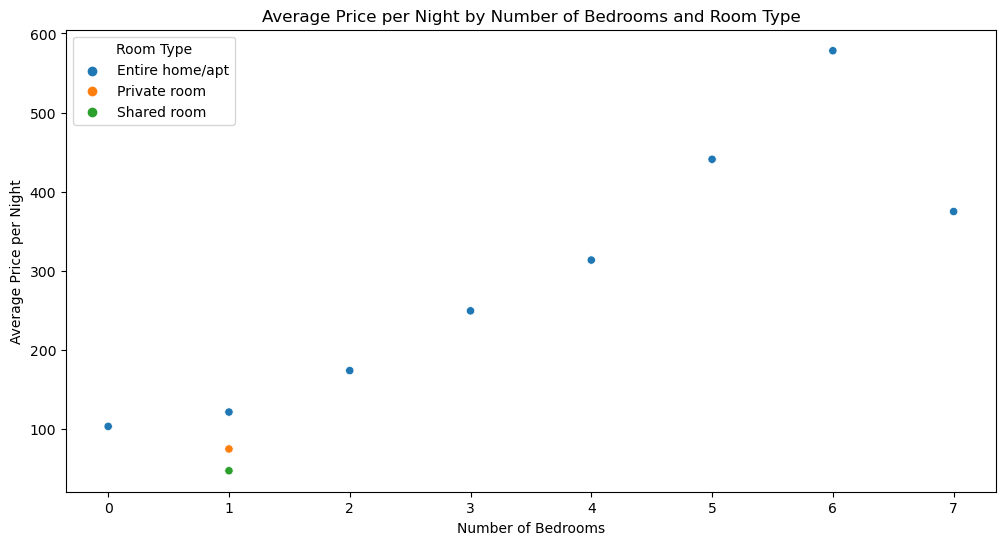

In [30]:
# Visualization with Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=summary, x='bedrooms', y='price', hue='room_type')
plt.title('Average Price per Night by Number of Bedrooms and Room Type')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price per Night')
plt.legend(title='Room Type')
plt.show()

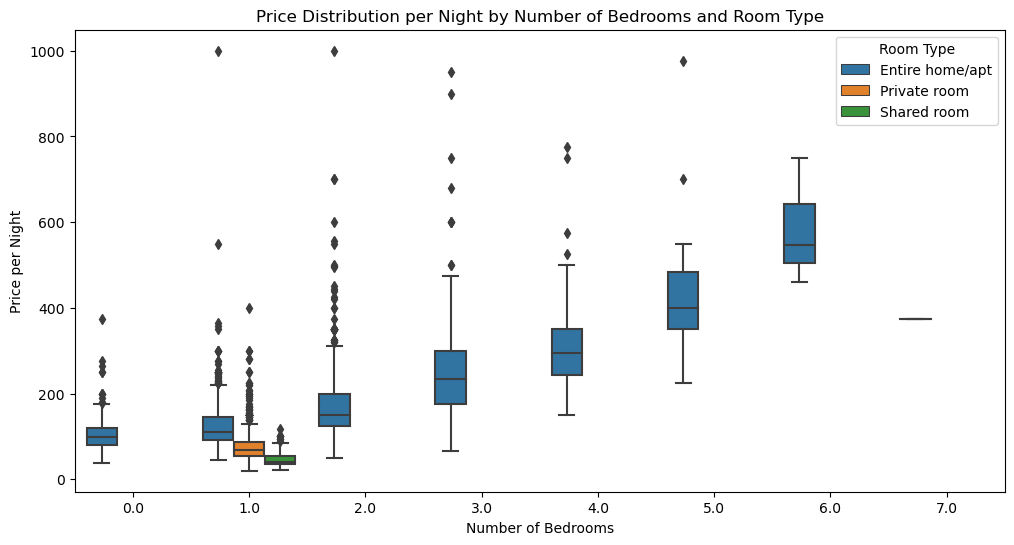

In [31]:
# Alternatively, a boxplot can provide a different perspective
plt.figure(figsize=(12, 6))
sns.boxplot(data=listings_df, x='bedrooms', y='price', hue='room_type')
plt.title('Price Distribution per Night by Number of Bedrooms and Room Type')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price per Night')
plt.legend(title='Room Type')
plt.show()

The plots show that there is a more or less linear relationship between the number of bedrooms and the price per night.

### Question 2 Analysis:

As i now have more insights on my possible pricing strategy i want to have a high utilization of my offering.

___What amenities do i need to have a higher chance of my service offering to be booked?___

In [32]:
# Calculate the correlation of amenities with the booking rate
correlation_with_booking_rate = listings_df[list(all_amenities) + ['booking_rate']].corr()['booking_rate'].sort_values()

In [33]:
# Remove the booking rate's self-correlation
correlation_with_booking_rate = correlation_with_booking_rate.drop('booking_rate')

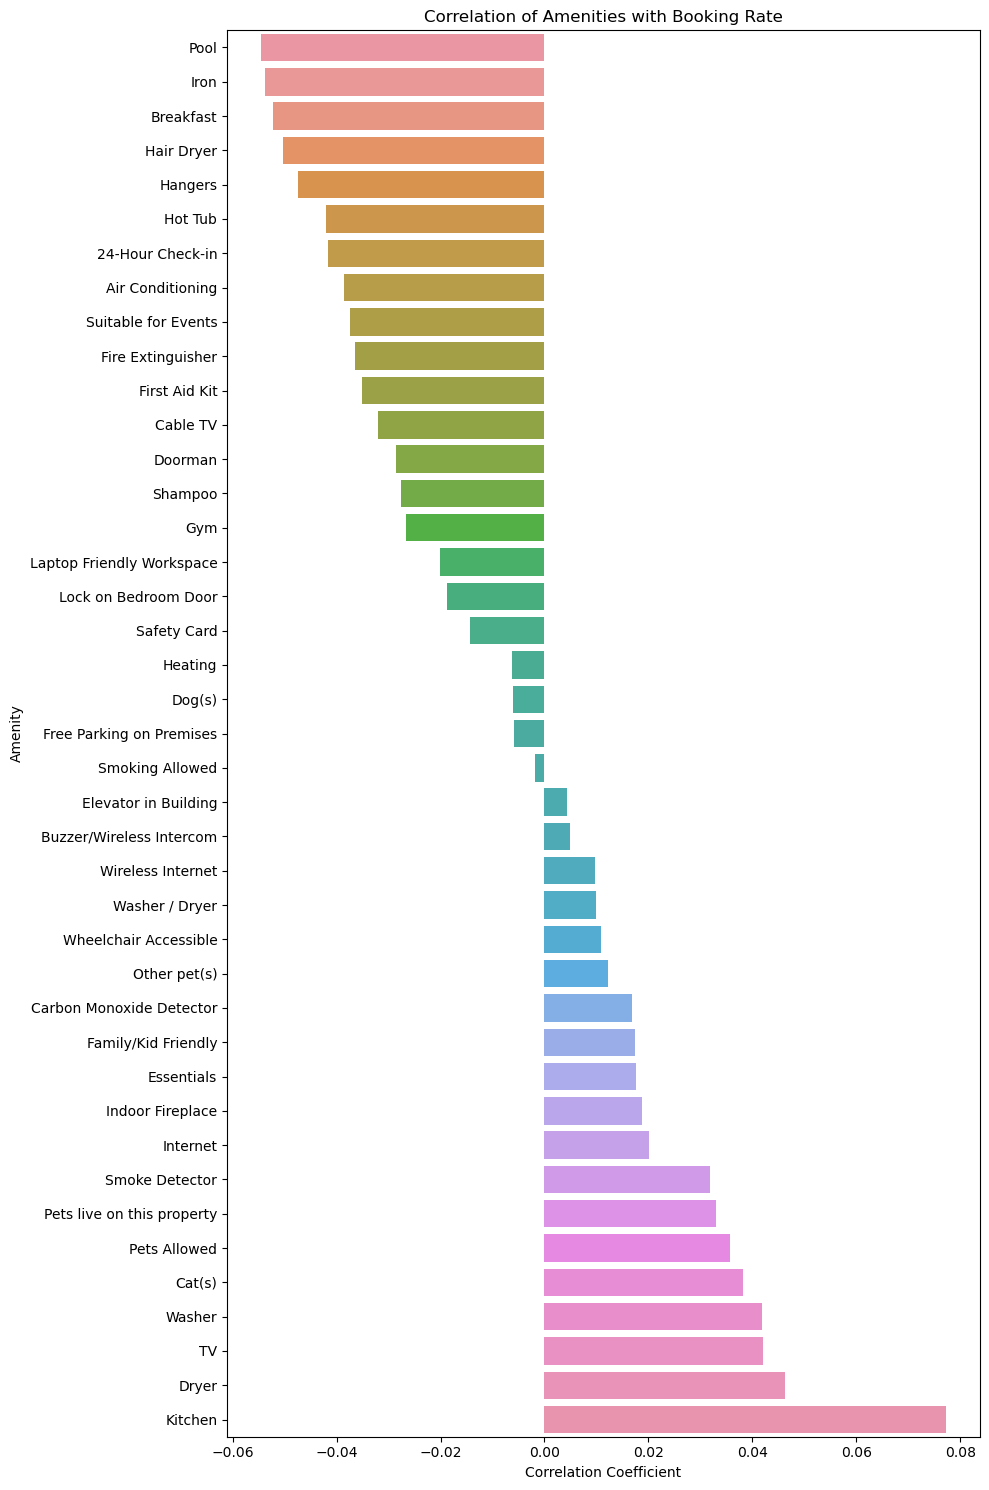

In [34]:
# Visualize the correlation of amenities with booking rate
plt.figure(figsize=(10, 15))
sns.barplot(x=correlation_with_booking_rate.values, y=correlation_with_booking_rate.index)
plt.title('Correlation of Amenities with Booking Rate')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Amenity')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

There are some essential amenietes that have a clear correlation to how often a offering is about to be booked.

### Question 3 Analysis:

Now that we know how our offering should be structured in terms of size, type, and amenities for the price and booking rate.

____Where should the our service offering be placed in terms of distance to downtown Seattle to get the best price and a booking rate of at least 60%?____

In [35]:
# Filter the DataFrame for booking rates at or above 60%
filtered_df = listings_df[listings_df['booking_rate'] >= 0.6]

In [36]:
# Normalize booking rate for the size of the scatter plot points
size_scaling_factor = 100  # You can fine-tune this factor
size = filtered_df['booking_rate'] * size_scaling_factor

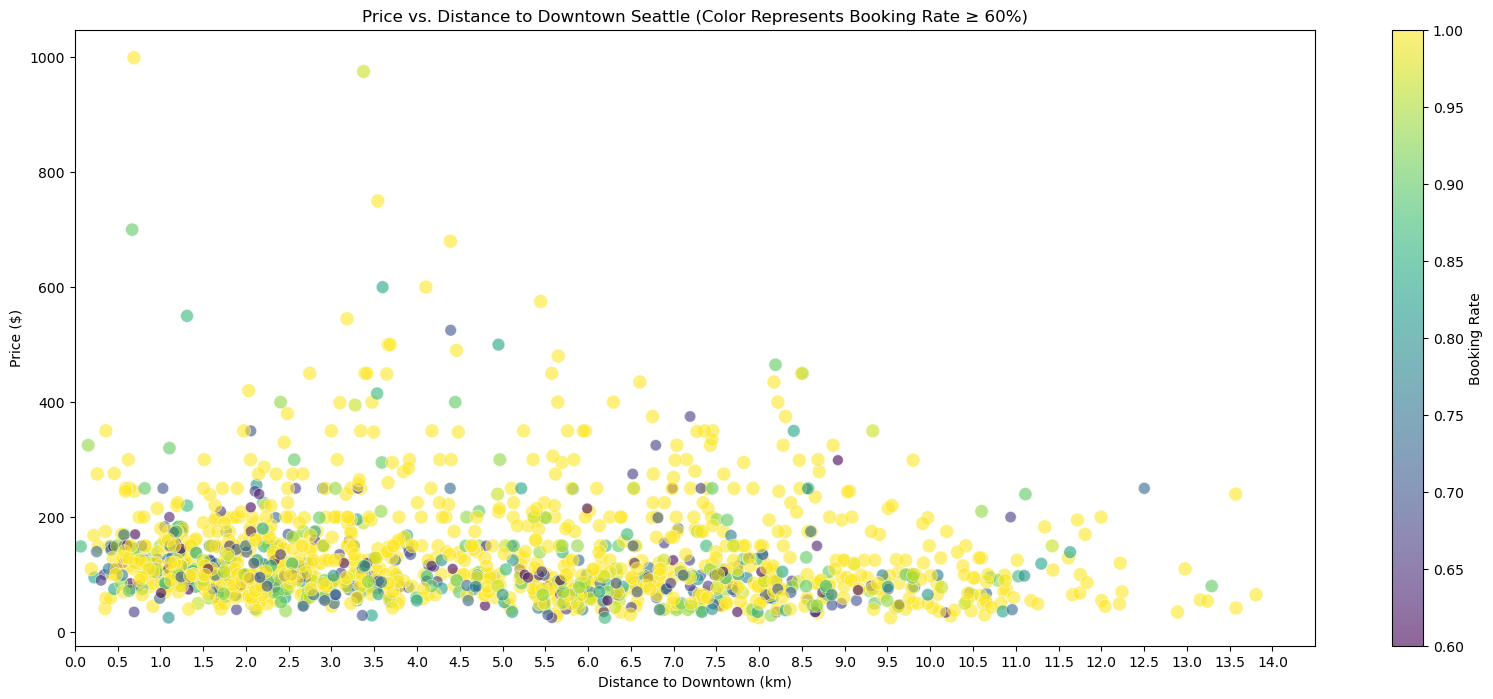

In [37]:
# Adjust the figure size to make the plot more precise
plt.figure(figsize=(20, 8))  # Increase figure size for better precision

# Create scatter plot with a colormap
scatter = plt.scatter(filtered_df['distance_to_downtown'], filtered_df['price'], 
                      s=size, c=filtered_df['booking_rate'], cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Create labels and title
plt.xlabel('Distance to Downtown (km)')
plt.ylabel('Price ($)')
plt.title('Price vs. Distance to Downtown Seattle (Color Represents Booking Rate ≥ 60%)')

# Define the colorbar and its label
cbar = plt.colorbar(scatter)
cbar.set_label('Booking Rate')

# Set x-axis major tick marks to be at every 0.5 and start at 0
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_xlim(left=0)  # Set the left x-axis limit to 0

# Show plot
plt.show()

The closer an offering is to downtown Seattle and if it is below 200 USD per night. The higher is it's utlization. Some listing are not following this observation but most of them do.

## Evaluation

Price and Size Correlation: The analysis confirms a positive correlation between the number of bedrooms in a listing and its nightly price. Generally, as the number of bedrooms increases, so does the price, indicating that larger properties command higher rates. There are outliers to this trend, suggesting that factors other than size may also play a role in pricing.

Influence of Amenities on Bookings: Core amenities such as having a kitchen, TV, and internet are associated with increased booking rates, highlighting their importance to guests. Interestingly, the specific brand or type of these amenities does not appear to have a substantial impact on booking frequency, pointing to a baseline expectation among travelers for these features.

Location Versus Price and Booking Rate: Proximity to downtown Seattle is a significant factor in booking rates, especially for listings priced at or below $200 per night. This suggests a strong market for reasonably priced accommodations near the city center. However, there are high-priced listings near downtown with high booking rates as well, indicating a niche for luxury accommodations. On the other hand, some lower-priced listings near downtown do not enjoy high booking rates, implying that guests consider more than just price and location when making their decisions.

These findings provide actionable insights for accommodation providers. To maximize occupancy and profitability in Seattle's competitive short-term rental market, providers should consider offering well-priced listings with essential amenities and, if possible, locate them near downtown. Additionally, there may be opportunities to cater to the luxury segment or to differentiate offerings in other ways that appeal to guests' specific preferences.